In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [4]:
#basic data cleaning and processing
df=pd.read_csv('Grocery_sales_dataset.csv')
df1=df
df1.drop(columns=['Unnamed: 0','holiday'],inplace=True)
df1.rename(columns={'product_name':'p_name','product_id':'p_id','buyer_gender':'gender','number_of_items_sold':'quantity'},inplace=True)
df1['total_revenue'].astype(int)
df1.isnull().sum()


p_name           0
category         0
price            0
sales_date       0
day_of_week      0
quantity         0
total_revenue    0
sales_time       0
p_id             0
gender           0
dtype: int64

In [5]:
df1.describe()

,price,quantity,total_revenue,p_id
count,22321.000000,22321.000000,22321.000000,22321.000000
mean,179.557233,11.478697,2042.458223,1048.263698
std,116.043786,9.279767,2229.649949,31.083915
min,55.000000,1.000000,55.000000,1011.000000
25%,80.000000,6.000000,605.000000,1022.000000
50%,134.000000,11.000000,1206.000000,1041.000000
75%,285.000000,16.000000,2800.000000,1078.000000
max,350.000000,144.000000,25200.000000,1091.000000


In [6]:
#total revenue on each day 
a=df1.groupby('sales_date')['total_revenue','quantity'].agg(['sum'])

C:\Users\Aniket\AppData\Local\Temp\ipykernel_21612\1361909053.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  a=df1.groupby('sales_date')['total_revenue','quantity'].agg(['sum'])


In [7]:
# avg no of item sale in day
a['quantity'].mean()

sum    561.877193
dtype: float64

In [8]:
# total revenue in each day
a['total_revenue']

,sum
sales_date,
2022-09-01,96056
2022-09-02,45777
2022-09-03,178222
2022-09-04,155935
2022-09-05,27357
...,...
2023-11-26,221816
2023-11-27,121235
2023-11-28,71616


In [9]:
df1.groupby('sales_date')


In [10]:
# visualization 
df[['p_name','category']]

,p_name,category
0,Milk packet,Dairy
1,Bread package,Bakery
2,Butter,Dairy
3,Milk packet,Dairy
4,Bread package,Bakery
...,...,...
22316,Butter,Dairy
22317,Eggs,Dairy
22318,Bread package,Bakery
22319,Jam jar,Grocery


<function matplotlib.pyplot.show(close=None, block=None)>

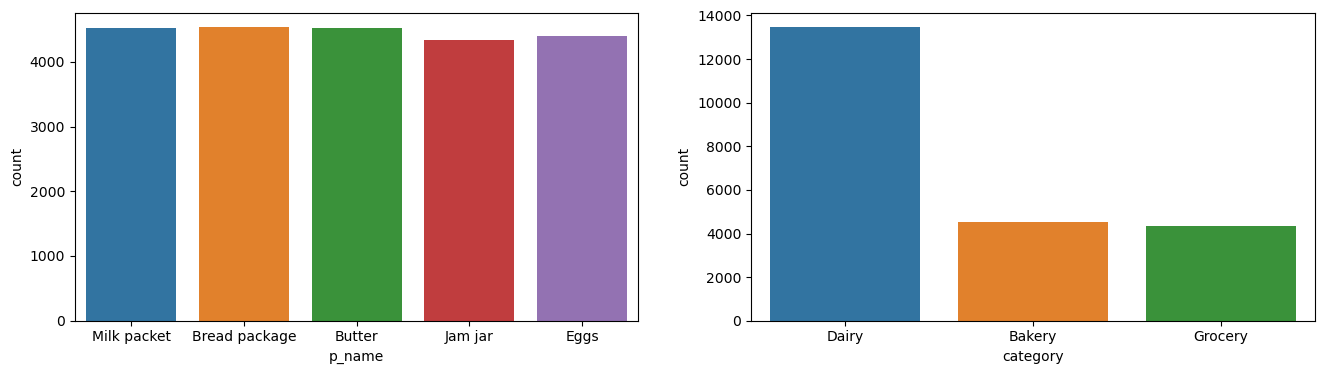

In [11]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
sns.countplot(x='p_name',data=df1)
plt.subplot(1,2,2)
sns.countplot(x='category',data=df1)
plt.show

## CATEGORY 

- In Category Dairy has highest sales count compare to Bakery & Groccery beacause in dairy 
  category contain milk packet butter and eggs which required daily &
  it contain 3 products and other category have only one product.
- Dairy has count more than 12000
- Bakery & grocery has almost same count around 4000


## PRODUCTS

- Milk packet, bread packet ,butter has almost same count beacuase all of three are need in morning breakfast.
- All products has count more than 4000


Text(0.5, 0, 'PRODUCTS')

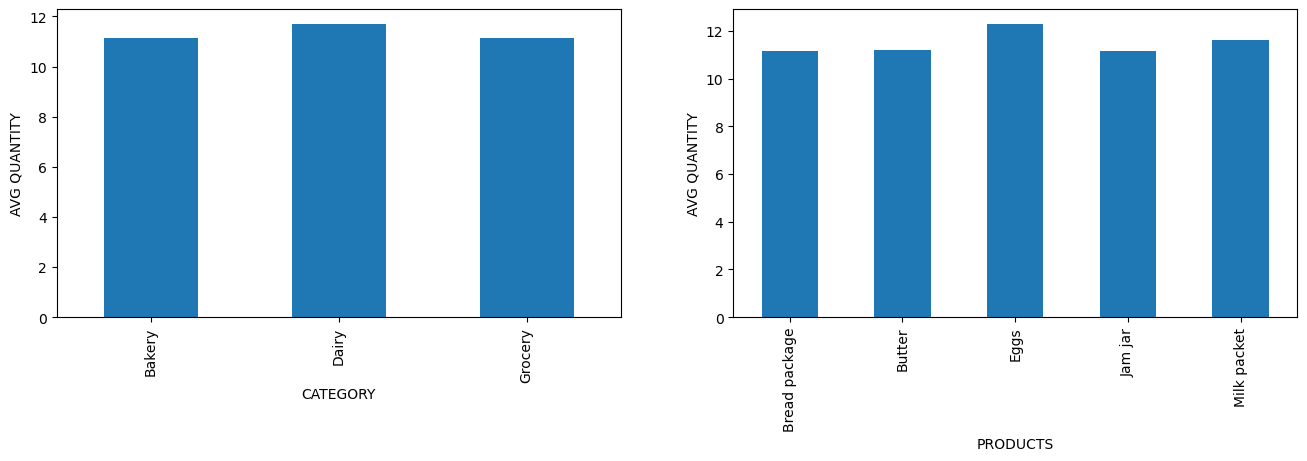

In [51]:
b=df1.groupby('p_name')['quantity'].agg('mean')
a=df1.groupby('category')['quantity'].agg('mean')

plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
a.plot(kind='bar')
plt.xlabel('CATEGORY')
plt.ylabel('AVG QUANTITY')
plt.subplot(1,2,2)
b.plot(kind='bar')
plt.ylabel('AVG QUANTITY')
plt.xlabel('PRODUCTS')


## CATEGORY 

- dairy has higest avg order quantity
- all three has avg order quantity is more than 10

## PRODUCTS

- eggs has highest avg order quantity
- all products has avg order quantity is more than 10

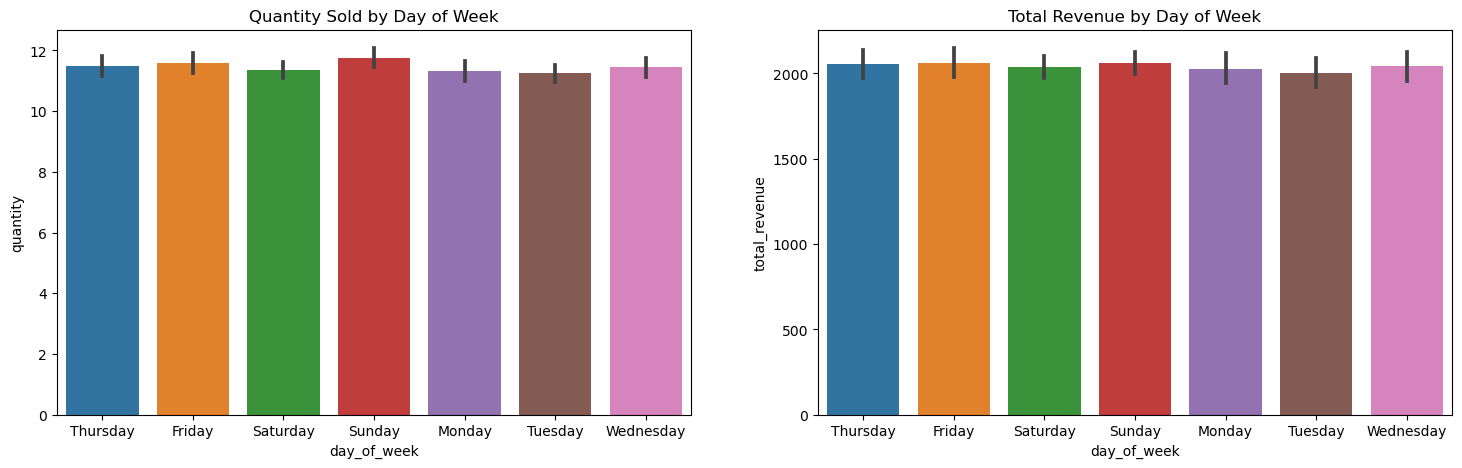

In [79]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1) 
sns.barplot(x='day_of_week', y='quantity', data=df1)
plt.title('Quantity Sold by Day of Week')
plt.subplot(1, 2, 2)  
sns.barplot(x='day_of_week', y='total_revenue', data=df1)
plt.title('Total Revenue by Day of Week')
plt.show()

## Quantity

- sunday has highest quantity of producta sales 
- all has almost same products sale quantity

## Revenue

- sunday Thrusday has higest no of revenue in week
- total revenue is around 2000

<Axes: xlabel='quantity', ylabel='total_revenue'>

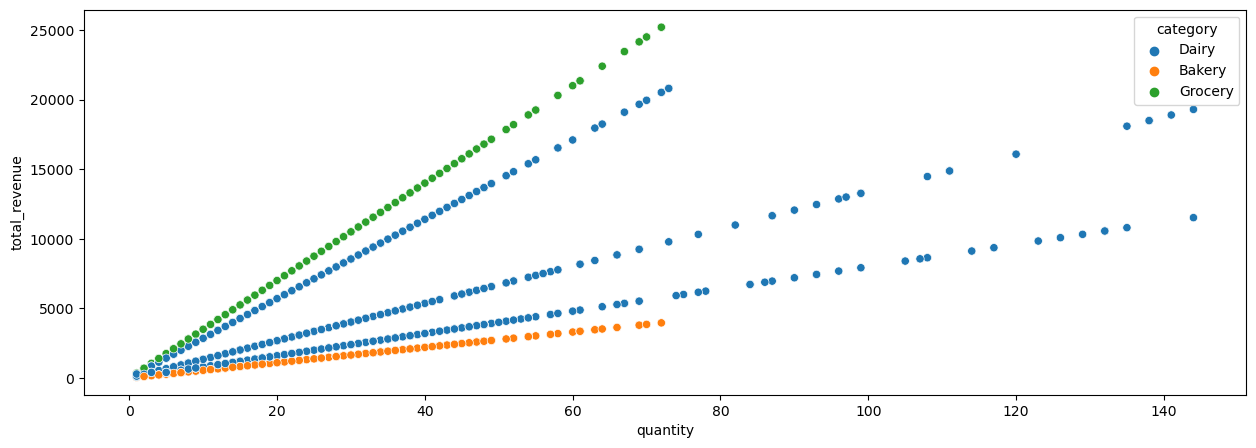

In [14]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='quantity',y='total_revenue',data=df1,hue='category')

## Relation between Quantity & Revenue 

- incerese in quantity increase in revenue bothe are in correlation 
- dairy has higest revenue & quantity 
- bakery & groccery quantity is less than 80 
- groccery has higest total revenue around 25000
- bakery has lowest revenue 5000

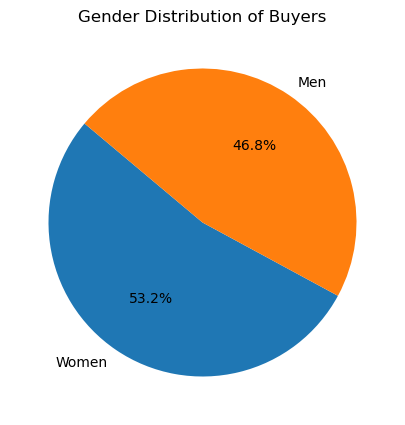

In [15]:
gender_count=df1['gender'].value_counts()
plt.figure(figsize=(20, 5))
plt.pie(gender_count,labels=gender_count.index,autopct='%1.1f%%',startangle=140)
plt.title('Gender Distribution of Buyers')
plt.show()

## GENDER 

- 53% buyers are females and 46% are males 


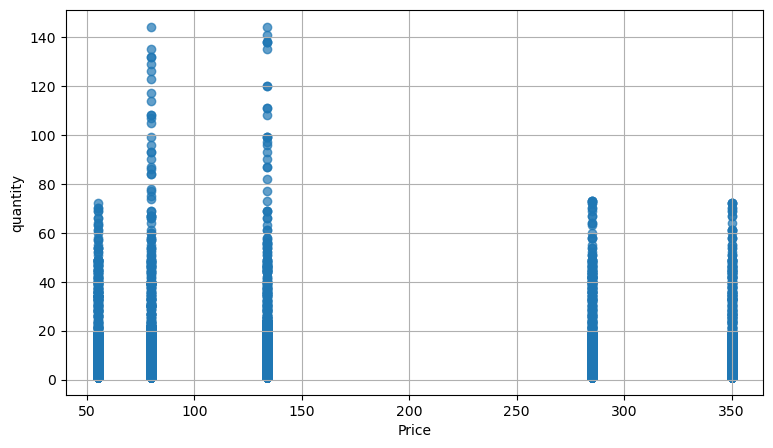

In [16]:
plt.figure(figsize=(9,5))
plt.scatter(x=df1['price'],y=df1['quantity'],alpha=0.7)
plt.xlabel('Price')
plt.ylabel('quantity')
plt.grid(True)
plt.show()

## Relationship between Price & Quantity
- mostly price less than 150 has higest quantity of product sold
- most of the time quantity is less than 80 
- 150 to 250 there is big gap theier is no sold products 
- higest quantity products sold in Price between 50 and 150